In [1]:
#coding:utf8
%matplotlib inline

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
#http://pandas.pydata.org/pandas-docs/stable/10min.html

这个一篇针对pandas新手的简短入门，想要了解更多复杂的内容，参阅[*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

通常，我们首先要导入以下几个库：

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

通过传递一个list来创建**Series**，pandas会默认创建整型索引：

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个**DataFrame**：

In [4]:
dates = pd.date_range('20130101', periods=6)
#
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
#numpy.random.rand(d0, d1, ..., dn)：生成一个[0,1)之间的随机浮点数或N维浮点数组
#numpy.random.randn(d0, d1, ..., dn)：生成一个浮点数或N维浮点数组，取数范围：正态分布的随机样本数
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.660627,1.153244,0.619988,-1.489102
2013-01-02,0.273281,0.257767,0.549295,-1.639151
2013-01-03,-0.366965,1.049469,0.968943,-0.723576
2013-01-04,0.339905,-1.238366,-1.734122,-1.382717
2013-01-05,-0.657343,0.600484,-0.048050,1.232868
2013-01-06,-0.236621,-0.115614,-1.034602,-0.037869


通过传递一个能够被转换为类似series的dict对象来创建一个**DataFrame**:

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


tab键补全列名（以及公共属性）将自动启用。这里是属性的子集：
df2.<TAB>
如你所见, 列 A, B, C, 和 D 也是自动完成标签. E 也是可用的; 

可以看到各列的数据类型为：

In [8]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

查看frame中头部和尾部的几行：

In [9]:
df.head()

,A,B,C,D
2013-01-01,-0.797290,-0.251394,-0.479293,-1.258262
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-03,0.512782,1.312247,0.651444,1.158869
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285
2013-01-05,0.490081,0.204613,-0.581628,-0.232023


In [10]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285
2013-01-05,0.490081,0.204613,-0.581628,-0.232023
2013-01-06,0.889528,0.803676,-0.986617,0.256299


显示索引、列名以及底层的numpy数据

In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [13]:
df.values

array([[-0.79728972, -0.25139407, -0.47929318, -1.25826194],
       [ 2.57032272,  0.26938806,  0.56012338,  1.01768776],
       [ 0.51278197,  1.31224685,  0.65144361,  1.15886932],
       [-0.68721203, -1.90693793, -1.89519175,  1.46028525],
       [ 0.49008072,  0.20461343, -0.58162821, -0.23202324],
       [ 0.88952831,  0.80367591, -0.98661684,  0.25629939]])

describe()能对数据做一个快速统计汇总

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.496369,0.071932,-0.455194,0.400476
std,1.227240,1.109134,0.962090,1.024847
min,-0.797290,-1.906938,-1.895192,-1.258262
25%,-0.392889,-0.137392,-0.885370,-0.109943
50%,0.501431,0.237001,-0.530461,0.636994
75%,0.795342,0.670104,0.300269,1.123574
max,2.570323,1.312247,0.651444,1.460285


对数据做转置：

In [15]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.797290,2.570323,0.512782,-0.687212,0.490081,0.889528
B,-0.251394,0.269388,1.312247,-1.906938,0.204613,0.803676
C,-0.479293,0.560123,0.651444,-1.895192,-0.581628,-0.986617
D,-1.258262,1.017688,1.158869,1.460285,-0.232023,0.256299


按轴进行排序：

In [16]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.258262,-0.479293,-0.251394,-0.797290
2013-01-02,1.017688,0.560123,0.269388,2.570323
2013-01-03,1.158869,0.651444,1.312247,0.512782
2013-01-04,1.460285,-1.895192,-1.906938,-0.687212
2013-01-05,-0.232023,-0.581628,0.204613,0.490081
2013-01-06,0.256299,-0.986617,0.803676,0.889528


按值进行排序 :

In [17]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285
2013-01-01,-0.797290,-0.251394,-0.479293,-1.258262
2013-01-05,0.490081,0.204613,-0.581628,-0.232023
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-06,0.889528,0.803676,-0.986617,0.256299
2013-01-03,0.512782,1.312247,0.651444,1.158869


# 数据选择

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

## 选取

选择某一列数据，它会返回一个**Series**，等同于**df.A**：

In [18]:
df['A']

2013-01-01   -0.797290
2013-01-02    2.570323
2013-01-03    0.512782
2013-01-04   -0.687212
2013-01-05    0.490081
2013-01-06    0.889528
Freq: D, Name: A, dtype: float64

通过使用**[ ]**进行切片选取：

In [19]:
df[0:3]

,A,B,C,D
2013-01-01,-0.797290,-0.251394,-0.479293,-1.258262
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-03,0.512782,1.312247,0.651444,1.158869


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-03,0.512782,1.312247,0.651444,1.158869
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285


## 通过标签选取

通过标签进行交叉选取：

In [21]:
df.loc[dates[0]]

A   -0.797290
B   -0.251394
C   -0.479293
D   -1.258262
Name: 2013-01-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [22]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.797290,-0.251394
2013-01-02,2.570323,0.269388
2013-01-03,0.512782,1.312247
2013-01-04,-0.687212,-1.906938
2013-01-05,0.490081,0.204613
2013-01-06,0.889528,0.803676


进行标签切片，包含两个端点

In [23]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,2.570323,0.269388
2013-01-03,0.512782,1.312247
2013-01-04,-0.687212,-1.906938


对于返回的对象进行降维处理

In [24]:
df.loc['20130102',['A','B']]

A    2.570323
B    0.269388
Name: 2013-01-02 00:00:00, dtype: float64

获取一个标量

In [25]:
df.loc[dates[0],'A']

-0.79728972181227264

快速获取标量（与上面的方法等价）

In [26]:
df.at[dates[0],'A']

-0.79728972181227264

## 通过位置选取

通过传递整型的位置进行选取

In [27]:
df.iloc[3]

A   -0.687212
B   -1.906938
C   -1.895192
D    1.460285
Name: 2013-01-04 00:00:00, dtype: float64

通过整型的位置切片进行选取，与python/numpy形式相同

In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.687212,-1.906938
2013-01-05,0.490081,0.204613


只对行进行切片

In [29]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-03,0.512782,1.312247,0.651444,1.158869


只对列进行切片

In [30]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.251394,-0.479293
2013-01-02,0.269388,0.560123
2013-01-03,1.312247,0.651444
2013-01-04,-1.906938,-1.895192
2013-01-05,0.204613,-0.581628
2013-01-06,0.803676,-0.986617


只获取某个值

In [31]:
df.iloc[1,1]

0.26938806116429348

快速获取某个值（与上面的方法等价）

In [32]:
df.iat[1,1]

0.26938806116429348

## 布尔索引

用某列的值来选取数据

In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-03,0.512782,1.312247,0.651444,1.158869
2013-01-05,0.490081,0.204613,-0.581628,-0.232023
2013-01-06,0.889528,0.803676,-0.986617,0.256299


用**where**操作来选取数据

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,2.570323,0.269388,0.560123,1.017688
2013-01-03,0.512782,1.312247,0.651444,1.158869
2013-01-04,NaN,NaN,NaN,1.460285
2013-01-05,0.490081,0.204613,NaN,NaN
2013-01-06,0.889528,0.803676,NaN,0.256299


用**isin()**方法来过滤数据

In [35]:
df2 = df.copy()

In [36]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.797290,-0.251394,-0.479293,-1.258262,one
2013-01-02,2.570323,0.269388,0.560123,1.017688,one
2013-01-03,0.512782,1.312247,0.651444,1.158869,two
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285,three
2013-01-05,0.490081,0.204613,-0.581628,-0.232023,four
2013-01-06,0.889528,0.803676,-0.986617,0.256299,three


In [37]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.512782,1.312247,0.651444,1.158869,two
2013-01-05,0.490081,0.204613,-0.581628,-0.232023,four


## 赋值

赋值一个新的列，通过索引来自动对齐数据

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.797290,-0.251394,-0.479293,-1.258262,NaN
2013-01-02,2.570323,0.269388,0.560123,1.017688,1
2013-01-03,0.512782,1.312247,0.651444,1.158869,2
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285,3
2013-01-05,0.490081,0.204613,-0.581628,-0.232023,4
2013-01-06,0.889528,0.803676,-0.986617,0.256299,5


通过标签赋值

In [40]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,-0.251394,-0.479293,-1.258262,NaN
2013-01-02,2.570323,0.269388,0.560123,1.017688,1
2013-01-03,0.512782,1.312247,0.651444,1.158869,2
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285,3
2013-01-05,0.490081,0.204613,-0.581628,-0.232023,4
2013-01-06,0.889528,0.803676,-0.986617,0.256299,5


通过位置赋值

In [41]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479293,-1.258262,NaN
2013-01-02,2.570323,0.269388,0.560123,1.017688,1
2013-01-03,0.512782,1.312247,0.651444,1.158869,2
2013-01-04,-0.687212,-1.906938,-1.895192,1.460285,3
2013-01-05,0.490081,0.204613,-0.581628,-0.232023,4
2013-01-06,0.889528,0.803676,-0.986617,0.256299,5


通过传递numpy array赋值

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479293,5,NaN
2013-01-02,2.570323,0.269388,0.560123,5,1
2013-01-03,0.512782,1.312247,0.651444,5,2
2013-01-04,-0.687212,-1.906938,-1.895192,5,3
2013-01-05,0.490081,0.204613,-0.581628,5,4
2013-01-06,0.889528,0.803676,-0.986617,5,5


通过**where**操作来赋值

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479293,-5,NaN
2013-01-02,-2.570323,-0.269388,-0.560123,-5,-1
2013-01-03,-0.512782,-1.312247,-0.651444,-5,-2
2013-01-04,-0.687212,-1.906938,-1.895192,-5,-3
2013-01-05,-0.490081,-0.204613,-0.581628,-5,-4
2013-01-06,-0.889528,-0.803676,-0.986617,-5,-5


# 缺失值处理

在pandas中，用**np.nan**来代表缺失值，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479293,5,NaN,1
2013-01-02,2.570323,0.269388,0.560123,5,1,1
2013-01-03,0.512782,1.312247,0.651444,5,2,NaN
2013-01-04,-0.687212,-1.906938,-1.895192,5,3,NaN


剔除所有包含缺失值的行数据

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,2.570323,0.269388,0.560123,5,1,1


填充缺失值

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479293,5,5,1
2013-01-02,2.570323,0.269388,0.560123,5,1,1
2013-01-03,0.512782,1.312247,0.651444,5,2,5
2013-01-04,-0.687212,-1.906938,-1.895192,5,3,5


获取值是否为**nan**的布尔标记

In [47]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


去除重复项

DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)

这个drop_duplicate方法是对DataFrame格式的数据，去除特定列下面的重复行。返回DataFrame格式的数据。

    subset : column label or sequence of labels, optional 
    用来指定特定的列，默认所有列
    keep : {‘first’, ‘last’, False}, default ‘first’ 
    删除重复项并保留第一次出现的项
    inplace : boolean, default False 
    是直接在原来数据上修改还是保留一个副本

In [ ]:
df1.drop_duplicates('E', 'first', False)

# 运算

## 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [48]:
df.mean()

A    0.629250
B    0.113831
C   -0.455194
D    5.000000
F    3.000000
dtype: float64

对其他轴进行同样的运算

In [49]:
df.mean(1)

2013-01-01    1.130177
2013-01-02    1.879967
2013-01-03    1.895294
2013-01-04    0.702132
2013-01-05    1.822613
2013-01-06    2.141317
Freq: D, dtype: float64

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.487218,0.312247,-0.348556,4,1
2013-01-04,-3.687212,-4.906938,-4.895192,2,0
2013-01-05,-4.509919,-4.795387,-5.581628,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 函数作用

通过apply()对函数作用

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479293,5,NaN
2013-01-02,2.570323,0.269388,0.080830,10,1
2013-01-03,3.083105,1.581635,0.732274,15,3
2013-01-04,2.395893,-0.325303,-1.162918,20,6
2013-01-05,2.885973,-0.120690,-1.744546,25,10
2013-01-06,3.775502,0.682986,-2.731163,30,15


In [53]:
df.apply(lambda x:x.max()-x.min())

A    3.257535
B    3.219185
C    2.546635
D    0.000000
F    4.000000
dtype: float64

## 频数统计

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    6
2    3
3    5
4    3
5    3
6    4
7    4
8    0
9    0
dtype: int32

In [55]:
s.value_counts()

3    3
5    2
4    2
0    2
6    1
dtype: int64

## 字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

## Concat 连接

pandas中提供了大量的方法能够轻松对Series，DataFrame和Panel对象进行不同满足逻辑关系的合并操作

通过**concat()**来连接pandas对象

In [57]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.358328,-0.917267,-0.713872,-0.991957
1,-1.002017,0.952365,-0.279115,-1.172856
2,1.227910,-0.156482,3.245353,0.067354
3,1.237094,0.309711,-0.863719,-1.871049
4,-0.401347,0.226986,-0.672437,-0.166693
5,1.108645,0.272753,-1.281637,0.726997
6,0.244444,-2.211821,1.943479,-1.098533
7,-0.620943,0.710649,-0.180102,-1.144573
8,0.140132,0.783428,-0.542937,0.177039
9,-1.221415,-0.059672,-2.288082,1.727063


In [58]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.358328 -0.917267 -0.713872 -0.991957
 1 -1.002017  0.952365 -0.279115 -1.172856
 2  1.227910 -0.156482  3.245353  0.067354,
           0         1         2         3
 3  1.237094  0.309711 -0.863719 -1.871049
 4 -0.401347  0.226986 -0.672437 -0.166693
 5  1.108645  0.272753 -1.281637  0.726997
 6  0.244444 -2.211821  1.943479 -1.098533,
           0         1         2         3
 7 -0.620943  0.710649 -0.180102 -1.144573
 8  0.140132  0.783428 -0.542937  0.177039
 9 -1.221415 -0.059672 -2.288082  1.727063]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,-0.358328,-0.917267,-0.713872,-0.991957
1,-1.002017,0.952365,-0.279115,-1.172856
2,1.227910,-0.156482,3.245353,0.067354
3,1.237094,0.309711,-0.863719,-1.871049
4,-0.401347,0.226986,-0.672437,-0.166693
5,1.108645,0.272753,-1.281637,0.726997
6,0.244444,-2.211821,1.943479,-1.098533
7,-0.620943,0.710649,-0.180102,-1.144573
8,0.140132,0.783428,-0.542937,0.177039
9,-1.221415,-0.059672,-2.288082,1.727063


## Join 合并

类似于SQL中的合并(merge)

In [60]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [61]:
right = pd.DataFrame({'key':['foo', 'foo'], 'lval':[4,5]})
right

,key,lval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append 添加

将若干行添加到dataFrame后面

In [63]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.547356,-0.885905,-1.791742,1.908368
1,0.961259,0.825907,1.074854,0.093868
2,0.782033,-0.914023,1.559572,0.616944
3,0.353374,-0.484523,-1.730823,2.503638
4,0.495378,-0.664738,1.192463,-0.900465
5,0.446744,-0.456149,-0.088171,1.450870
6,0.422372,-2.207023,-1.007185,-0.304415
7,2.183043,0.069862,-0.376567,1.403847


In [64]:
s = df.iloc[3]
s

A    0.353374
B   -0.484523
C   -1.730823
D    2.503638
Name: 3, dtype: float64

In [65]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.547356,-0.885905,-1.791742,1.908368
1,0.961259,0.825907,1.074854,0.093868
2,0.782033,-0.914023,1.559572,0.616944
3,0.353374,-0.484523,-1.730823,2.503638
4,0.495378,-0.664738,1.192463,-0.900465
5,0.446744,-0.456149,-0.088171,1.450870
6,0.422372,-2.207023,-1.007185,-0.304415
7,2.183043,0.069862,-0.376567,1.403847
8,0.353374,-0.484523,-1.730823,2.503638


# 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：
* **划分** 按照某些标准将数据分为不同的组
* **应用** 对每组数据分别执行一个函数
* **组合** 将结果组合到一个数据结构

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.511832,0.323650
1,bar,one,1.135199,2.046447
2,foo,two,0.048247,-0.250839
3,bar,three,0.232861,-0.827749
4,foo,two,-1.502759,-0.869657
5,bar,two,1.604747,0.072619
6,foo,one,-0.553633,0.388030
7,bar,three,-2.580702,0.546721


分组并对每个分组应用sum函数

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,0.392104,1.838039
foo,-0.496312,-0.408816


按多个列分组形成层级索引，然后应用函数

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.135199  2.046447
    three -2.347841 -0.281028
    two    1.604747  0.072619
foo one    0.958199  0.711681
    two   -1.454511 -1.120496

# 变形

## 堆叠

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [71]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [72]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.305811 -0.539703
      two     0.214511  0.514641
baz   one    -0.208686 -0.686508
      two    -0.565780  0.945584

**stack()**方法对DataFrame的列“压缩”一个层级

In [73]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.305811
               B   -0.539703
       two     A    0.214511
               B    0.514641
baz    one     A   -0.208686
               B   -0.686508
       two     A   -0.565780
               B    0.945584
dtype: float64

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），**stack()**的逆操作是**unstack()**，默认反堆叠到上一个层级

In [74]:
stacked.unstack()

A         B
first second                    
bar   one    -0.305811 -0.539703
      two     0.214511  0.514641
baz   one    -0.208686 -0.686508
      two    -0.565780  0.945584

In [75]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.305811  0.214511
      B -0.539703  0.514641
baz   A -0.208686 -0.565780
      B -0.686508  0.945584

In [76]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.305811 -0.208686
       B -0.539703 -0.686508
two    A  0.214511 -0.565780
       B  0.514641  0.945584

## 数据透视表

In [77]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.560128,0.607515
1,one,B,foo,0.749692,-0.470557
2,two,C,foo,1.239602,1.378625
3,three,A,bar,0.706071,-0.614495
4,one,B,bar,1.304376,-1.128074
5,one,C,bar,-0.901451,-0.220037
6,two,A,foo,-0.685465,-0.174906
7,three,B,foo,-0.224895,0.156997
8,one,C,foo,-1.722116,0.761828
9,one,A,bar,-0.337629,1.093555


 我们可以轻松地从这个数据得到透视表

In [78]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.337629 -0.560128
      B  1.304376  0.749692
      C -0.901451 -1.722116
three A  0.706071       NaN
      B       NaN -0.224895
      C  0.573971       NaN
two   A       NaN -0.685465
      B -1.343353       NaN
      C       NaN  1.239602

# 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此。

In [79]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [80]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    292
2012-01-01 00:00:01     28
2012-01-01 00:00:02    195
2012-01-01 00:00:03    340
2012-01-01 00:00:04    256
2012-01-01 00:00:05    169
2012-01-01 00:00:06    362
2012-01-01 00:00:07    197
2012-01-01 00:00:08    164
2012-01-01 00:00:09    437
2012-01-01 00:00:10    467
2012-01-01 00:00:11     16
2012-01-01 00:00:12      2
2012-01-01 00:00:13     36
2012-01-01 00:00:14    127
2012-01-01 00:00:15    171
2012-01-01 00:00:16    208
2012-01-01 00:00:17    216
2012-01-01 00:00:18    487
2012-01-01 00:00:19    377
2012-01-01 00:00:20     13
2012-01-01 00:00:21    444
2012-01-01 00:00:22    180
2012-01-01 00:00:23    262
2012-01-01 00:00:24    422
2012-01-01 00:00:25    297
2012-01-01 00:00:26    234
2012-01-01 00:00:27    252
2012-01-01 00:00:28     31
2012-01-01 00:00:29    303
                      ... 
2012-01-01 00:01:10    483
2012-01-01 00:01:11    410
2012-01-01 00:01:12    254
2012-01-01 00:01:13    357
2012-01-01 00:01:14    468
2012-01-01 00:01:15    243
2

In [81]:
ts.resample('5Min', how='sum')

2012-01-01    25778
Freq: 5T, dtype: int32

时区表示

In [82]:
rng = pd.date_range('3/6/2012', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [83]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06    1.883053
2012-03-07    1.657763
2012-03-08    0.676596
2012-03-09    0.477890
2012-03-10   -0.566615
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    1.883053
2012-03-07 00:00:00+00:00    1.657763
2012-03-08 00:00:00+00:00    0.676596
2012-03-09 00:00:00+00:00    0.477890
2012-03-10 00:00:00+00:00   -0.566615
Freq: D, dtype: float64

时区转换

In [85]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.883053
2012-03-06 19:00:00-05:00    1.657763
2012-03-07 19:00:00-05:00    0.676596
2012-03-08 19:00:00-05:00    0.477890
2012-03-09 19:00:00-05:00   -0.566615
Freq: D, dtype: float64

时间跨度转换

In [86]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [87]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.569720
2012-02-29    2.055821
2012-03-31   -0.850667
2012-04-30    1.895128
2012-05-31    2.204973
Freq: M, dtype: float64

In [88]:
ps = ts.to_period()
ps

2012-01    0.569720
2012-02    2.055821
2012-03   -0.850667
2012-04    1.895128
2012-05    2.204973
Freq: M, dtype: float64

In [89]:
ps.to_timestamp()

2012-01-01    0.569720
2012-02-01    2.055821
2012-03-01   -0.850667
2012-04-01    1.895128
2012-05-01    2.204973
Freq: MS, dtype: float64

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [90]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='int64', freq='Q-NOV')

In [91]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts

1990Q1    1.219483
1990Q2    0.295619
1990Q3    2.177954
1990Q4    0.437791
1991Q1   -1.150226
1991Q2   -0.155793
1991Q3   -0.899163
1991Q4    1.108673
1992Q1   -0.189505
1992Q2   -0.919934
1992Q3   -2.593031
1992Q4    0.184326
1993Q1    0.822122
1993Q2   -2.534715
1993Q3   -0.482651
1993Q4    0.234846
1994Q1   -1.038624
1994Q2   -1.985862
1994Q3    1.445492
1994Q4    1.325495
1995Q1   -0.823989
1995Q2   -0.633812
1995Q3   -0.572880
1995Q4    0.426740
1996Q1    0.411217
1996Q2   -0.676600
1996Q3   -1.350879
1996Q4   -1.557402
1997Q1   -0.302270
1997Q2    1.077077
1997Q3   -0.187689
1997Q4   -0.102634
1998Q1    0.038094
1998Q2   -1.321694
1998Q3   -2.049545
1998Q4    0.205804
1999Q1    0.627608
1999Q2    2.099334
1999Q3    1.490896
1999Q4   -0.652193
2000Q1    0.408912
2000Q2   -1.426349
2000Q3    0.038938
2000Q4   -1.118917
Freq: Q-NOV, dtype: float64

In [92]:
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts

1990-02-01 09:00    1.219483
1990-05-01 09:00    0.295619
1990-08-01 09:00    2.177954
1990-11-01 09:00    0.437791
1991-02-01 09:00   -1.150226
1991-05-01 09:00   -0.155793
1991-08-01 09:00   -0.899163
1991-11-01 09:00    1.108673
1992-02-01 09:00   -0.189505
1992-05-01 09:00   -0.919934
1992-08-01 09:00   -2.593031
1992-11-01 09:00    0.184326
1993-02-01 09:00    0.822122
1993-05-01 09:00   -2.534715
1993-08-01 09:00   -0.482651
1993-11-01 09:00    0.234846
1994-02-01 09:00   -1.038624
1994-05-01 09:00   -1.985862
1994-08-01 09:00    1.445492
1994-11-01 09:00    1.325495
1995-02-01 09:00   -0.823989
1995-05-01 09:00   -0.633812
1995-08-01 09:00   -0.572880
1995-11-01 09:00    0.426740
1996-02-01 09:00    0.411217
1996-05-01 09:00   -0.676600
1996-08-01 09:00   -1.350879
1996-11-01 09:00   -1.557402
1997-02-01 09:00   -0.302270
1997-05-01 09:00    1.077077
1997-08-01 09:00   -0.187689
1997-11-01 09:00   -0.102634
1998-02-01 09:00    0.038094
1998-05-01 09:00   -1.321694
1998-08-01 09:

# 分类

从版本0.15开始，pandas在**DataFrame**中开始包括分类数据。

In [93]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'e', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,e
5,6,e


把raw_grade转换为分类类型

In [94]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    e
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

重命名类别名为更有意义的名称

In [95]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

对分类重新排序，并添加缺失的分类

In [96]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4     very bad
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是按照分类的顺序进行的，而不是字典序

In [97]:
df.sort_values(by="grade")

,id,raw_grade,grade
4,5,e,very bad
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


按分类分组时，也会显示空的分类

In [98]:
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64

# 绘图

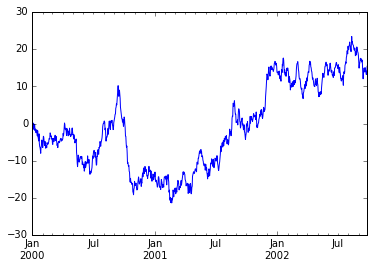

In [99]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，**plot()**能很方便地画出所有列及其标签

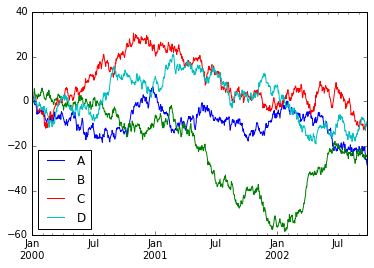

In [100]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 获取数据的I/O

## CSV

写入一个csv文件

In [101]:
df.to_csv('foo.csv')

从一个csv文件读入

In [102]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.871715,0.889797,-0.452757,-0.065875
1,2000-01-02,1.030719,0.982527,-0.632324,0.453500
2,2000-01-03,0.634178,1.389564,-0.497967,-0.269316
3,2000-01-04,1.018194,1.176338,-0.024616,0.013515
4,2000-01-05,-0.137956,1.385163,0.930470,-0.698086
5,2000-01-06,0.632541,3.757807,1.680543,1.157284
6,2000-01-07,-1.037892,5.667231,2.364400,2.170764
7,2000-01-08,-1.375110,4.580663,2.251072,3.029680
8,2000-01-09,-1.619662,2.636465,3.044900,2.165869
9,2000-01-10,-1.454407,1.728391,2.388801,1.033930


## HDF5

HDFStores的读写

写入一个HDF5 Store

In [103]:
df.to_hdf('foo.h5', 'df')

从一个HDF5 Store读入

In [104]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.871715,0.889797,-0.452757,-0.065875
2000-01-02,1.030719,0.982527,-0.632324,0.453500
2000-01-03,0.634178,1.389564,-0.497967,-0.269316
2000-01-04,1.018194,1.176338,-0.024616,0.013515
2000-01-05,-0.137956,1.385163,0.930470,-0.698086
2000-01-06,0.632541,3.757807,1.680543,1.157284
2000-01-07,-1.037892,5.667231,2.364400,2.170764
2000-01-08,-1.375110,4.580663,2.251072,3.029680
2000-01-09,-1.619662,2.636465,3.044900,2.165869
2000-01-10,-1.454407,1.728391,2.388801,1.033930


## Excel

MS Excel的读写

写入一个Excel文件

In [105]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

从一个excel文件读入

In [106]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,-0.871715,0.889797,-0.452757,-0.065875
2000-01-02,1.030719,0.982527,-0.632324,0.453500
2000-01-03,0.634178,1.389564,-0.497967,-0.269316
2000-01-04,1.018194,1.176338,-0.024616,0.013515
2000-01-05,-0.137956,1.385163,0.930470,-0.698086
2000-01-06,0.632541,3.757807,1.680543,1.157284
2000-01-07,-1.037892,5.667231,2.364400,2.170764
2000-01-08,-1.375110,4.580663,2.251072,3.029680
2000-01-09,-1.619662,2.636465,3.044900,2.165869
2000-01-10,-1.454407,1.728391,2.388801,1.033930
